<img src="https://logos-world.net/wp-content/uploads/2021/08/7-Eleven-Emblem.png" width='300' height="150" >

In [565]:

import os
import os                                        # for customising home directory
import math                
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline                   
import sklearn

from statsmodels.formula import api                # library used for model training ( better statisics)
from sklearn.linear_model import LinearRegression  # Another library used for model training 
from sklearn.feature_selection import RFE          # library used to reduce collinearity and feature selection
from sklearn.preprocessing import StandardScaler   # used for Standardasing
from sklearn.model_selection import train_test_split # used for train/test splits

from IPython.display import display # function used to render appropriate mehod to display objects # new function in week


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # used for performance metrics

import matplotlib.pyplot as plt # used for plotting
import warnings # used to set how much warnings should be displayed
warnings.filterwarnings('ignore')


In [567]:
plt.rcParams['figure.figsize'] = [7,4] # inch

In [568]:
sales = pd.read_csv('seven_eleven_sales.csv')

sales.head()

original_sales=sales.copy(deep=True)

print(' The given sales data consists of {0} data entries (rows) across {1} columns. ' .format(sales.shape[0],sales.shape[1]))

 The given sales data consists of 6435 data entries (rows) across 8 columns. 


In [569]:
original_sales.shape

(6435, 8)

In [570]:
original_sales.shape

(6435, 8)

In [571]:
original_sales.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [572]:
original_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [573]:
sales.Date

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [574]:
sales.Date=pd.to_datetime(sales.Date,dayfirst=True)

sales['weekday']=sales.Date.dt.weekday
sales['month']=sales.Date.dt.month
sales['year']=sales.Date.dt.year

sales.drop(['Date'],axis=1,inplace=True)
sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [575]:
sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [576]:
sales.weekday.value_counts()

4    6435
Name: weekday, dtype: int64

In [577]:
sales.weekday.unique()

array([4], dtype=int64)

In [578]:
target='Weekly_Sales'
features= [i for i in sales.columns if i!='Weekly_Sales']
original_sales=sales.copy(deep=True)
features

['Store',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'weekday',
 'month',
 'year']

In [579]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [580]:
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


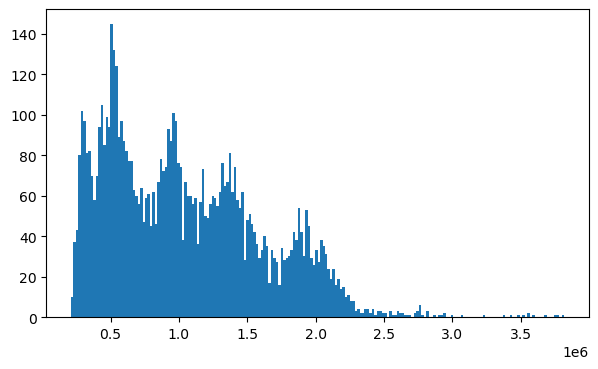

In [581]:
plt.hist(sales.Weekly_Sales,bins=200);

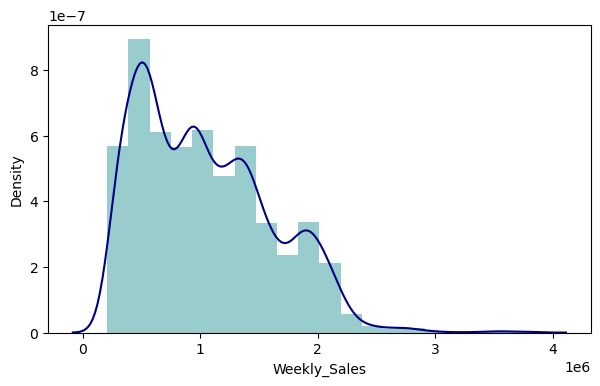

In [582]:
sns.distplot(sales.Weekly_Sales,bins=20,kde_kws={'color':'Navy'},hist_kws={'color':'teal'});

In [583]:
display(sales.describe(),sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


None

In [584]:
sales.duplicated().sum()

0

In [585]:
duplicate_count=0
rows,columns=sales.shape

sales.drop_duplicates(inplace=True)

if sales.shape==(rows,columns):
    print("No duplicates")
else:
    print('Duplicates removed /t',str(rows-sales.shape[0]))

No duplicates


In [586]:
sales.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
weekday            1
month             12
year               3
dtype: int64

In [587]:
features

['Store',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'weekday',
 'month',
 'year']

In [588]:
sales.Store.nunique()

45

In [589]:
num_f=[]
cat_f=[]

for i in features:
    if sales[i].nunique()<=45:
        cat_f.append(i)
    else:
        num_f.append(i)

In [590]:
display(num_f,cat_f)

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

['Store', 'Holiday_Flag', 'weekday', 'month', 'year']

### <Center>Univariate Analysis of Target Variable

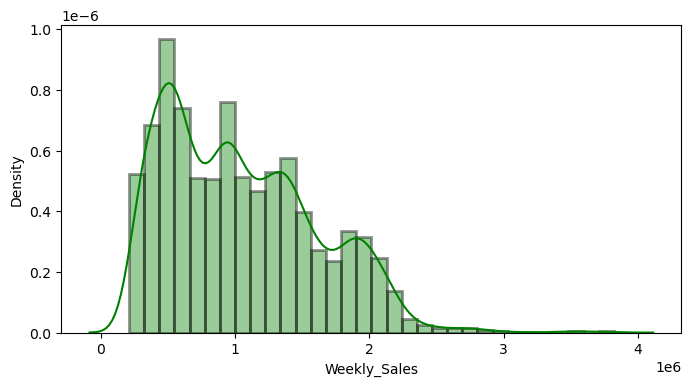

In [591]:
plt.figure(figsize=[8,4])
sns.distplot(sales[target],color='g',hist_kws=dict(edgecolor='black',linewidth=2.1),bins=32);

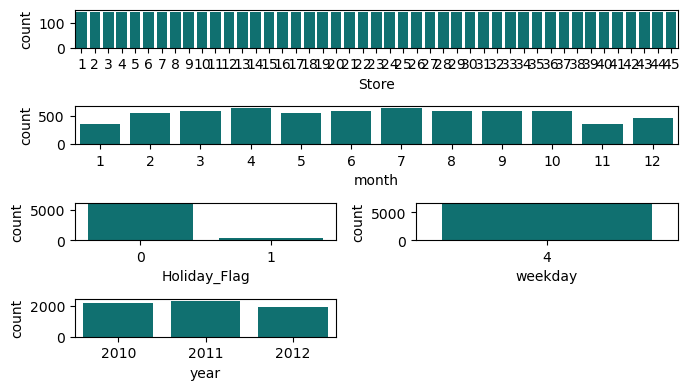

In [592]:
k=1
for i in range(len(cat_f)):
    if sales[cat_f[i]].nunique()>8:
        plt.subplot(4,1,k)
        sns.countplot(sales[cat_f[i]],color='teal')
        k+=1
        plt.tight_layout()
l=5        
for i in range(len(cat_f)):
    if sales[cat_f[i]].nunique()<=8:
        plt.subplot(4,2,l)
        sns.countplot(sales[cat_f[i]],color='teal')
        l+=1
        plt.tight_layout()

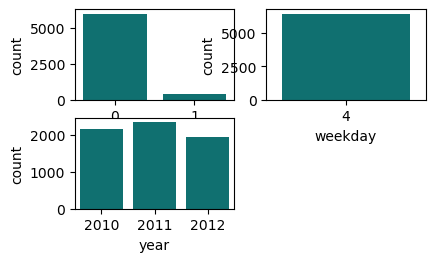

In [593]:
for i in range(len(cat_f)):
    if sales[cat_f[i]].nunique()<=8:
        plt.subplot(3,3,i+1)
        sns.countplot(sales[cat_f[i]],color='teal')

In [594]:
sales['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

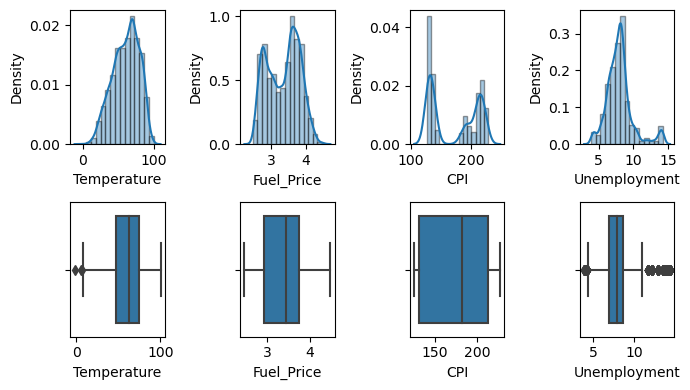

In [595]:
for i in range(len(num_f)):
    plt.subplot(2,4,i+1)
    sns.distplot(sales[num_f[i]],hist_kws={'edgecolor':'black'},bins=15)
    plt.tight_layout();
    
for i in range(len(num_f)):
    plt.subplot(2,4,i+5)
    sns.boxplot(sales[num_f[i]])
    plt.tight_layout();    

# <center> 'Bi-Variate Analysis of Numerical features to check for collinearity'

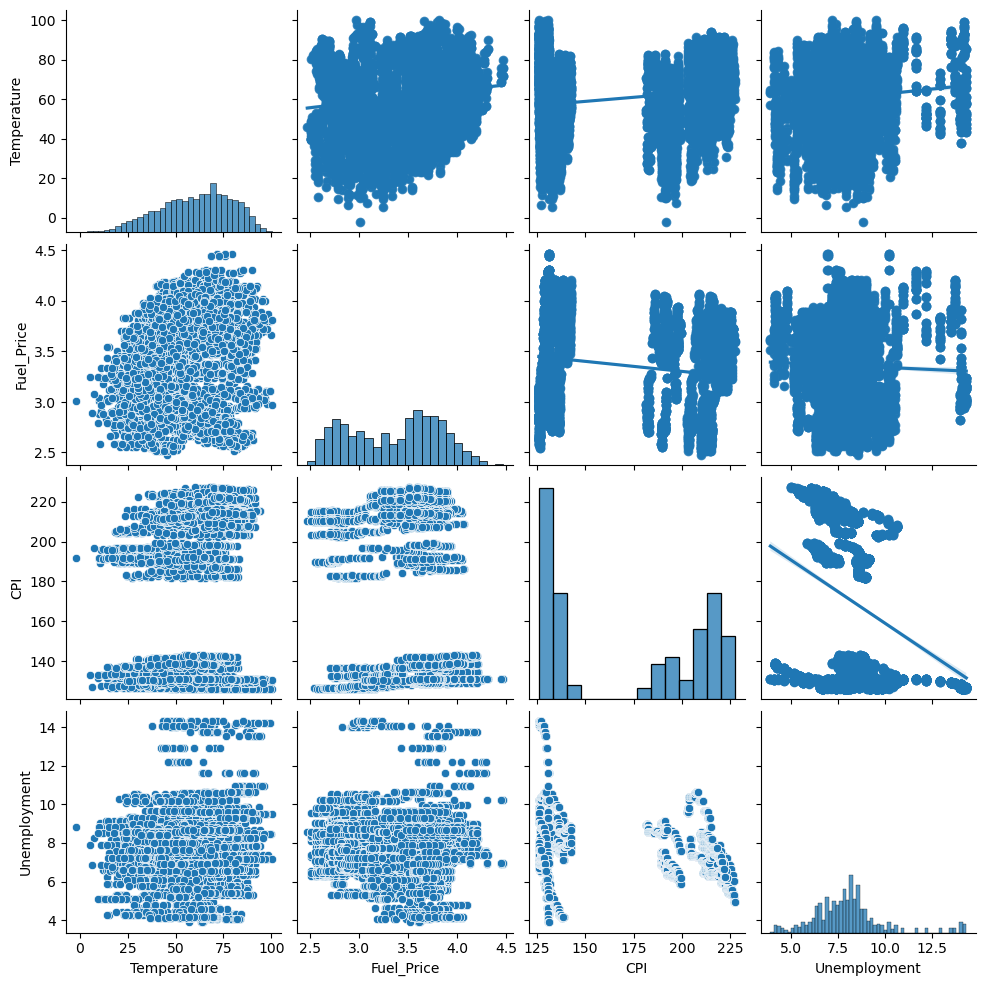

In [596]:
sns.pairplot(sales[num_f]).map_upper(sns.regplot);

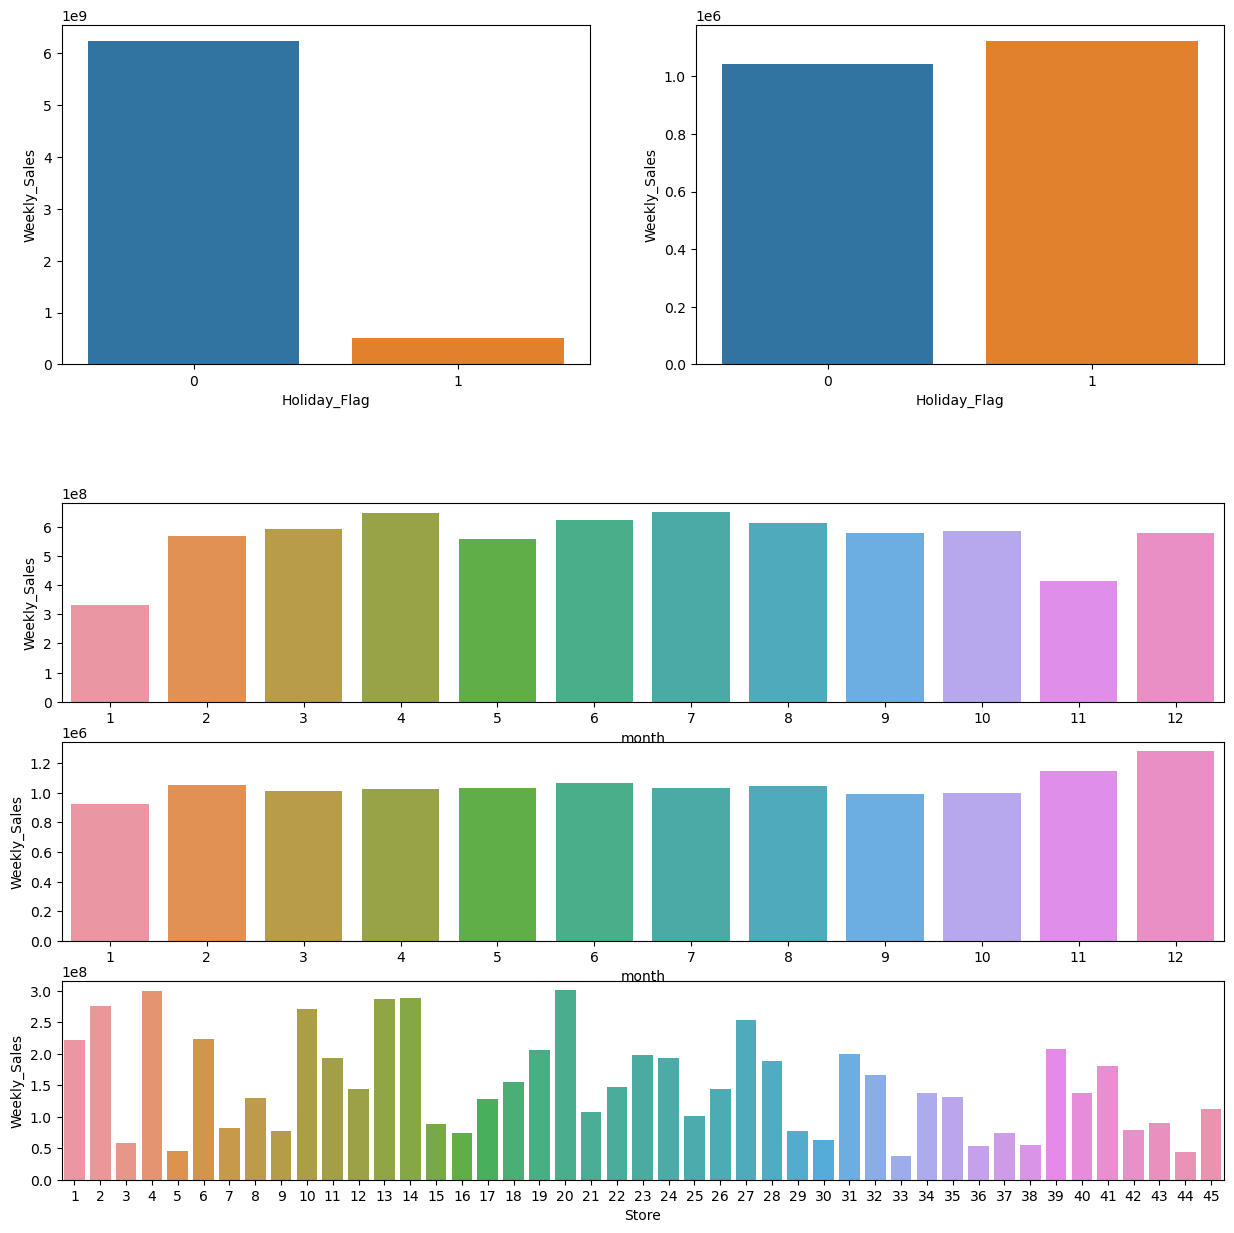

In [597]:
plt.figure(figsize=[15,15])

plt.subplot(3,2,1)
grouped_sales=pd.DataFrame(sales['Weekly_Sales'].groupby(sales['Holiday_Flag']).agg(np.sum)).reset_index()
sns.barplot(data=grouped_sales,x='Holiday_Flag',y='Weekly_Sales')

plt.subplot(3,2,2)
grouped_sales=pd.DataFrame(sales['Weekly_Sales'].groupby(sales['Holiday_Flag']).agg(np.mean)).reset_index()
sns.barplot(data=grouped_sales,x='Holiday_Flag',y='Weekly_Sales');

plt.subplot(5,1,3)
grouped_sales=pd.DataFrame(sales['Weekly_Sales'].groupby(sales['month']).agg(np.sum)).reset_index()
sns.barplot(data=grouped_sales,x='month',y='Weekly_Sales');
plt.tight_layout()

plt.subplot(5,1,4)
grouped_sales=pd.DataFrame(sales['Weekly_Sales'].groupby(sales['month']).agg(np.mean)).reset_index()
sns.barplot(data=grouped_sales,x='month',y='Weekly_Sales');
plt.tight_layout()

plt.subplot(5,1,5)
grouped_sales=pd.DataFrame(sales['Weekly_Sales'].groupby(sales['Store']).agg(np.sum)).reset_index()
sns.barplot(data=grouped_sales,x='Store',y='Weekly_Sales');
plt.tight_layout()

In [598]:
cat_f

['Store', 'Holiday_Flag', 'weekday', 'month', 'year']

In [599]:
num_f

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [600]:
for i in num_f:                                       #quartile= quantile
    quartile1 = sales[i].quantile(0.25)
    quartile3 = sales[i].quantile(0.75)
    
    iqr = quartile3-quartile1
    lower_fence = quartile1-1.5*iqr
    upper_fence = quartile3+1.5*iqr
    
    sales_new = sales[sales[i] >= lower_fence]
    sales_new = sales[sales[i] <= upper_fence]
    
display(sales_new.head())

print('Before outlier removal,the dataset has {0} rows'.format(sales_dummy.shape[0]))
print('After outlier removal,the dataset has {0} rows'.format(sales_new.shape[0]))


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


Before outlier removal,the dataset has 6435 rows
After outlier removal,the dataset has 6057 rows


In [601]:
X=sales_new.drop(['Weekly_Sales'],axis=1)
Y=sales_new.Weekly_Sales

Train_X,Test_X,Train_Y,Test_Y=train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=150)

print('Date before Train/test split->>',sales_new.shape,'\n Train dataset->> ',Train_X.shape,Train_Y.shape,'\n test dataset',Test_X.shape,Test_Y.shape)


Date before Train/test split->> (6057, 10) 
 Train dataset->>  (4542, 9) (4542,) 
 test dataset (1515, 9) (1515,)


# <center> Standardization of training dataset

In [602]:
td=StandardScaler()

# since we only need to standardize numerical features
Train_X_to_std=Train_X[Train_X.columns[Train_X.columns.isin(num_f)]]
Train_X_std=std.fit_transform(Train_X_to_std)
Train_X_std=pd.DataFrame(Train_X_std,columns=Train_X_to_std.columns)

Test_X_to_std=Test_X[Test_X.columns[Test_X.columns.isin(num_f)]]
Test_X_std=std.transform(Test_X_to_std)
Test_X_std=pd.DataFrame(Test_X_std,columns=Test_X_to_std.columns)

In [603]:
display(Train_X_std.shape,Test_X_std.shape)

(4542, 4)

(1515, 4)

# <center> we worked on our numerical data now its time to work on our categorical data

In [604]:
Train_X_to_encode=Train_X[Train_X.columns[Train_X.columns.isin(cat_f)]].reset_index(drop=True)

Test_X_to_encode=Test_X[Test_X.columns[Test_X.columns.isin(cat_f)]].reset_index(drop=True)

In [605]:
Test_X_to_encode

,Store,Holiday_Flag,weekday,month,year
0,10,0,4,10,2012
1,9,0,4,6,2011
2,7,0,4,12,2011
3,4,0,4,4,2012
4,9,0,4,2,2012
...,...,...,...,...,...
1510,17,0,4,6,2012
1511,36,0,4,6,2010
1512,6,0,4,10,2011
1513,23,0,4,9,2010


In [614]:
categories_dummy_Train=pd.DataFrame()

for category in cat_f:
    categories_dummy_Train=pd.concat([categories_dummy_Train,
            pd.get_dummies(Train_X_to_encode[category],drop_first=False,prefix=str(category))],axis=1).reset_index(drop=True)

categories_dummy_Test=pd.DataFrame()

for category in cat_f:
    categories_dummy_Test=pd.concat([categories_dummy_Test,
            pd.get_dummies(Test_X_to_encode[category],drop_first=False,prefix=str(category))],axis=1).reset_index(drop=True)
    
categories_dummy_Test.shape

(1515, 63)

# <center>  Now concatenating Train_X categorical data which is hot encoded to Train_X numerical data which is scaled

In [607]:
Train_X_std=pd.concat([Train_X_std,categories_dummy_Train],axis=1)
Test_X_std=pd.concat([Test_X_std,categories_dummy_Test],axis=1)

In [608]:
display(Train_X_std.shape,Train_Y.shape,Test_X_std.shape,Test_Y.shape)

(4542, 67)

(4542,)

(1515, 67)

(1515,)

## <center> Feature Engineering | Feature Selection using RFE

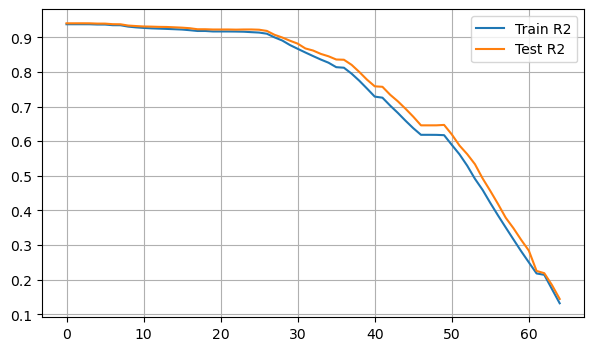

In [609]:
from sklearn.feature_selection import RFE


train_r2=[]
test_r2=[]


max_features=Train_X_std.shape[1]-2

for i in range(max_features):
    
    lm=LinearRegression()
    rfe=RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)
    rfe.fit(Train_X_std,Train_Y)
    
    LR=LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_],Train_Y)
    
    pred_train=LR.predict(Train_X_std.loc[:,rfe.support_])
    pred_test=LR.predict(Test_X_std.loc[:,rfe.support_])
    
    train_r2.append(r2_score(Train_Y,pred_train))
    test_r2.append(r2_score(Test_Y,pred_test))
    
plt.plot(train_r2,label='Train R2')
plt.plot(test_r2,label='Test R2')

plt.legend()
plt.grid()

### <center> As we can see , after dropping 25 variables the r_2 score begin to fall rapidly, so optimum features to drop can be assumed as 25

In [610]:
lm=LinearRegression()
    
rfe=RFE(lm,n_features_to_select=Train_X_std.shape[1]-25)
rfe.fit(Train_X_std,Train_Y)
    
LR=LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_],Train_Y)
    
pred_train=LR.predict(Train_X_std.loc[:,rfe.support_])
pred_test=LR.predict(Test_X_std.loc[:,rfe.support_])

display(r2_score(Train_Y,pred_train),r2_score(Test_Y,pred_test))


0.9136258673087249

0.9218367413780951

In [611]:
# Storing our new reduced data in new variables for model training 

Train_X_std_rfe = Train_X_std.loc[:,rfe.support_]
Test_X_std_rfe = Test_X_std.loc[:,rfe.support_]


### Model Training | Multiple Linear Regression ( on reduced data after RFE )

In [612]:
MLR = LinearRegression().fit(Train_X_std_rfe,Train_Y)

In [613]:
print('The Coeffecient of the MLR model is ',MLR.coef_)

print('\n The Intercept of the MLR model is',MLR.intercept_)

The Coeffecient of the MLR model is  [-4.64911784e+05 -1.61335717e+06 -1.69935910e+06 -4.43013928e+05
 -1.44209050e+06 -1.11364992e+06 -1.47626689e+06 -6.53034994e+05
 -1.04254801e+06 -1.39042055e+06 -1.49682995e+06 -1.12583887e+06
 -9.28017781e+05 -5.81796760e+05 -1.26388606e+06 -9.88897953e+05
 -6.17206245e+05 -6.67291120e+05 -1.31063285e+06 -1.01384333e+06
 -2.32143852e+05 -8.05547302e+05 -1.47709830e+06 -1.58240338e+06
 -6.21944593e+05 -8.68271653e+05 -1.75992056e+06 -1.06134805e+06
 -1.10134844e+06 -1.64353148e+06 -1.50178494e+06 -1.57068375e+06
 -5.79840963e+05 -1.04991692e+06 -7.50103568e+05 -1.46420335e+06
 -1.38836620e+06 -1.71753913e+06 -1.22163456e+06  4.54075552e+18
  4.54075552e+18  4.54075552e+18]

 The Intercept of the MLR model is -4.5407555156825615e+18
